In [1]:
import sys
#import Backtest
from GeneralBacktest import Backtest,Bid,Position
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
import pickle
import yfinance as yf
#warnings.filterwarnings("ignore")
plt.style.use('seaborn')

# Bid Class Demo
## intialize a Bid instance with four variables
- ticker
- shares
- price
- bid_type (1 as buy, 0 as sell)


In [2]:
# a bid to buy 100 shares of Apple at $163.43
buy_apple_100 = Bid(ticker = "AAPL", shares = 100, price = 163.43, bid_type = 1)

#the show method could be used for debugging
buy_apple_100.show()

---------------
Buying:
Ticker: AAPL
Shares: 100
Price: 163.43
---------------


# 

# Position class demo
## intialize a Position  instance with a bid instance

In [3]:
apple_position = Position(buy_apple_100)
apple_position.show()

Ticker: AAPL
Shares_held: 100
Latest_price: 163.43
weighted_average_cost: 163.43
----------------
Purchasing History
Price	Shares
163.43	100


## Change the position with another bid

In [4]:
buy_apple_50 = Bid(ticker = "AAPL", shares = 50, price = 163.13, bid_type = 1)
apple_position.change_position(buy_apple_50)
apple_position.show()

Ticker: AAPL
Shares_held: 150
Latest_price: 163.13
weighted_average_cost: 163.33
----------------
Purchasing History
Price	Shares
163.43	100
163.13	50


## Selling a stock

In [5]:
sell_apple_100 = Bid(ticker = 'AAPL', shares = 100, price = 165.24, bid_type = 0)

#if selling a stock, the change_position method will return a cost
#this cost will be the lowest part of costs in purchasing history 
cost_of_buying_100 = apple_position.change_position(sell_apple_100)
apple_position.show()

Ticker: AAPL
Shares_held: 50
Latest_price: 165.24
weighted_average_cost: 163.43
----------------
Purchasing History
Price	Shares
163.43	50


In [6]:
income = sell_apple_100.shares * sell_apple_100.price
print("Income: ", income)
print("Cost: ", cost_of_buying_100)
print("Pnl for this single trade: ", income - cost_of_buying_100 )

Income:  16524.0
Cost:  16328.0
Pnl for this single trade:  196.0


## Can't sell more than you have

In [7]:
apple_position.change_position(sell_apple_100)

Try to sell 100 shares, but only got 50 shares.


-1

# A demo strategy
## Buy 100 shares of AAPL every Monday, then sell on Friday
## a strategy is defined as a class, and it must have a predict method that returns a list of Bid instances
## a strategy function has five parameters, which are:
- ti: current datetime 
- df: all historical data up to ti
- positions: a dictionary of all current positions (k: string of ticker, v: an instance of this ticker's Position)
- cash: cash avaliable
- full_data: dataframe with OHLCV

## *This is the part where you implement your strategy

In [8]:
class DemoStrategy:
    
    def predict(ti,df,positions,cash,full_data):
        """A function that will be called at every ti that returns a list of bids(orders)

        Args:
            ti (pd.DatetimeIndex): current time
            df (pd.DataFrame): all history prices up to ti
            cash (float): starting cash at this round
            full_data(pd.DataFrame): OHLCV up to this ti, optional to be empty

        Returns:
            a list of Bid instances to execute at this round
        
        """

        
        bid_list = []

        # if Monday
        if ti.weekday() == 0:
            price = df.iloc[-1]['AAPL'] #AAPL's current price
            bid = Bid(ticker = 'AAPL', shares = 100, price = price,bid_type = 1)

            bid_list.append(bid)
        
        #if Friday
        if ti.weekday() == 4:
            price = df.iloc[-1]['AAPL'] #AAPL's current price
            bid = Bid(ticker = 'AAPL', shares = 100, price = price,bid_type = 0)

            bid_list.append(bid)
        
        return bid_list

## Load sample data

In [9]:
data = pd.read_csv("test_data.csv",index_col = 0)
data.index = pd.to_datetime(data.index)
data.head()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-20,45.672226,67.746773,75.681816,158.183182,259.739990,38.793434,172.204147,177.789688,89.863503,256.562775,...,237.594376,149.610031,97.356354,44.043068,150.371948,48.581097,54.631924,45.600048,93.002449,66.370712
2019-03-21,47.354343,68.429039,75.795403,160.057327,264.179993,39.217850,172.897949,180.732117,90.962997,261.649475,...,239.036133,151.106140,99.052338,43.422256,152.376923,49.103390,55.336681,45.111477,93.398445,66.754303
2019-03-22,46.373714,67.182434,73.816734,157.203217,259.690002,38.486416,168.221588,179.748230,88.238503,257.990936,...,234.360107,149.256927,96.842163,42.215588,149.706924,50.341709,54.301296,43.709091,92.663010,65.685143
2019-03-25,45.813011,66.971848,74.062904,157.051041,262.269989,38.332909,168.122467,181.641785,88.712997,257.558960,...,234.141953,150.074631,96.436188,42.058201,149.667770,50.611271,53.674843,43.500996,92.559303,65.228065
2019-03-26,45.339684,68.024742,74.791878,158.820541,265.589996,38.874706,169.636185,181.047699,89.188004,261.852234,...,230.850708,150.362686,97.798386,42.416702,151.887848,51.074593,53.874958,44.342426,92.700722,66.076881


In [10]:
data.shape

(896, 100)

# Backtest Demo
## initialize a Backtest instance with data and strategy, in default:

In [11]:
demo_strat = Backtest(data, DemoStrategy)

In [12]:
demo_strat.backtest_full()

====================Start====================
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Try to sell 100 shares, but only got 0 shares.
Finished, Final Return = 0.0383


## After backtest, check all historical transactions with transaction_history, a dataframe that recorded each bid, its transaction cost and pnl.

In [13]:
demo_strat.transaction_history

,dt,ticker,type,price,shares,amount,transaction_cost,pnl
0,2019-03-25,AAPL,1,45.813011,100,4581.301117,0.0,0.000000
1,2019-03-29,AAPL,0,46.106712,100,4610.671234,0.0,29.370117
2,2019-04-01,AAPL,1,46.419830,100,4641.983032,0.0,0.000000
3,2019-04-05,AAPL,0,47.817966,100,4781.796646,0.0,139.813614
4,2019-04-08,AAPL,1,48.570442,100,4857.044220,0.0,0.000000
...,...,...,...,...,...,...,...,...
331,2022-09-23,AAPL,0,150.429993,100,15042.999268,0.0,-405.000305
332,2022-09-26,AAPL,1,150.770004,100,15077.000427,0.0,0.000000
333,2022-09-30,AAPL,0,138.199997,100,13819.999695,0.0,-1257.000732
334,2022-10-03,AAPL,1,142.449997,100,14244.999695,0.0,0.000000


In [14]:
print("Total Transaction cost:", demo_strat.transaction_history['transaction_cost'].sum())

Total Transaction cost: 0.0


<AxesSubplot:>

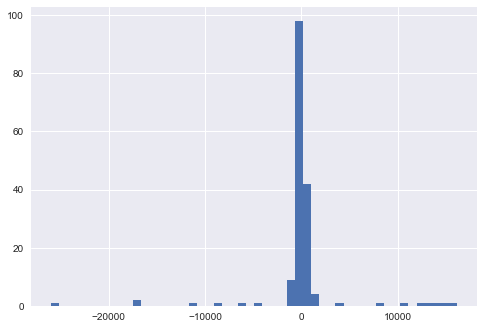

In [15]:
#histogram of pnl
demo_strat.transaction_history[demo_strat.transaction_history.type ==0]['pnl'].hist(bins = 50)

## The portfolio_tracker records the # of bids, length of positions, cash value, position value, total value at each ti. 
## The bah column is the value stored assuming we buy all the tickers when it begins, will be used for benchmark

In [16]:
demo_strat.portfolio_tracker

,dt,bid_count,position_count,cash_value,positions_value,total_value,bah
0,2019-03-20,0,0,100000.000000,0.000000,100000.000000,100000.000000
1,2019-03-21,0,0,100000.000000,0.000000,100000.000000,100954.473649
2,2019-03-22,1,0,100000.000000,0.000000,100000.000000,99110.452320
3,2019-03-25,1,1,95418.698883,4581.301117,100000.000000,99028.807052
4,2019-03-26,0,1,95418.698883,4533.968353,99952.667236,99948.807689
...,...,...,...,...,...,...,...
891,2022-09-30,1,0,104061.518860,0.000000,104061.518860,145482.006651
892,2022-10-03,1,1,89816.519165,14244.999695,104061.518860,147742.010895
893,2022-10-04,0,1,89816.519165,14610.000610,104426.519775,152403.253638
894,2022-10-05,0,1,89816.519165,14639.999390,104456.518555,151698.105409


## The plot method will plot the value of portfolio over time, along with the buy and hold strategy

## more metrics and graphs are being developed

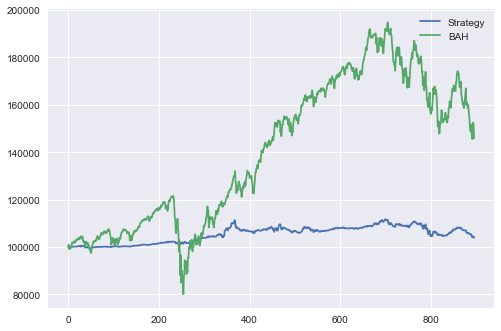

In [17]:
demo_strat.plot()

# 

# Upload to dashboard
## the upload_to_dashboard method will upload this graph to dashboard.
## make sure the crediential file "algo-trade-dashboard-80cae071e907.json" is under current directory, also install the related packages in requirements.txt

## to upload, call the function with the strategy name, if the name already exist in the gcloud, the previous data will be overwritten

In [18]:
demo_strat.upload_to_dashboard("demo")

Data uploaded.


# Check on dashboard:
https://tigaji-algo-trade-dashboard-dashboard-gv8r0a.streamlitapp.com/